In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.pipeline import make_pipeline,Pipeline
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import regex as re
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
%matplotlib inline

In [2]:
data = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
for i in data.columns:
    print(data[i].value_counts())
    print('*'*50)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
**************************************************
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
**************************************************
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Le

In [6]:
data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
data.drop(columns=['society','availability'],inplace=True,axis=1)

In [8]:
data.head(2)

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13320 non-null  object 
 1   location    13319 non-null  object 
 2   size        13304 non-null  object 
 3   total_sqft  13320 non-null  object 
 4   bath        13247 non-null  float64
 5   balcony     12711 non-null  float64
 6   price       13320 non-null  float64
dtypes: float64(3), object(4)
memory usage: 728.6+ KB


In [10]:
data.location.fillna(data.location.mode()[0],inplace=True)

In [11]:
data.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [12]:
#for value in data.total_sqft.unique():
#    print(value)

In [13]:
data.total_sqft

0        1056
1        2600
2        1440
3        1521
4        1200
         ... 
13315    3453
13316    3600
13317    1141
13318    4689
13319     550
Name: total_sqft, Length: 13320, dtype: object

In [14]:
def fun(x):
    x = x.split('-')
    if len(x) > 1:
        avg = (float(x[0])+float(x[1]))/2
        return avg
    else:
        if 'Sq. Meter' in x[0]:
            match = re.search(r'\d+', x[0])
            num = int(match.group())
            return num * 10.7639
        
        elif 'Sq. Yards' in x[0]:
            match = re.search(r'\d+', x[0])
            num = int(match.group())
            return num * 9
        
        elif 'Acres' in x[0]:
            match = re.search(r'\d+', x[0])
            num = int(match.group())
            return num * 43560
        elif 'Cents' in x[0]:
            match = re.search(r'\d+', x[0])
            num = int(match.group())
            return num * 435.6
        elif 'Guntha' in x[0]:
            match = re.search(r'\d+', x[0])
            num = int(match.group())
            return num * 1089
        elif 'Grounds' in x[0]:
            match = re.search(r'\d+', x[0])
            num = int(match.group())
            return num * 2400
        
        elif 'Perch' in x[0]:
            match = re.search(r'\d+', x[0])
            num = int(match.group())
            return num * 272.25
        else:
            return float(x[0])

In [15]:
data.total_sqft = data.total_sqft.apply(fun)

In [16]:
data.corr(numeric_only=True)

,total_sqft,bath,balcony,price
total_sqft,1.000000,0.053329,0.006832,0.049008
bath,0.053329,1.000000,0.204201,0.456345
balcony,0.006832,0.204201,1.000000,0.120355
price,0.049008,0.456345,0.120355,1.000000


In [17]:
data.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13320 non-null  object 
 1   location    13320 non-null  object 
 2   size        13304 non-null  object 
 3   total_sqft  13320 non-null  float64
 4   bath        13247 non-null  float64
 5   balcony     12711 non-null  float64
 6   price       13320 non-null  float64
dtypes: float64(4), object(3)
memory usage: 728.6+ KB


In [19]:
data.isnull().sum()

area_type       0
location        0
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

C:\Users\DARSHIT\AppData\Local\Temp\ipykernel_11956\382643837.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = data.bath)


<Axes: ylabel='Density'>

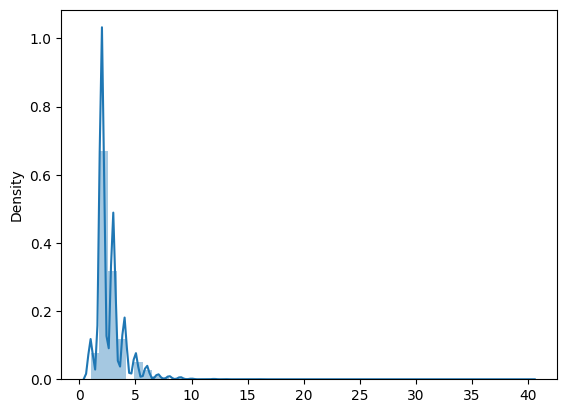

In [20]:
sns.distplot(x = data.bath)

C:\Users\DARSHIT\AppData\Local\Temp\ipykernel_11956\4032532646.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.balcony)


<Axes: xlabel='balcony', ylabel='Density'>

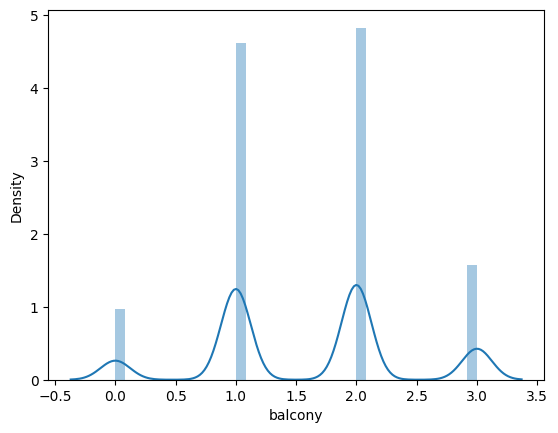

In [21]:
sns.distplot(data.balcony)

In [22]:
data.describe()['balcony']

count    12711.000000
mean         1.584376
std          0.817263
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: balcony, dtype: float64

In [23]:
data.balcony.value_counts()

balcony
2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: count, dtype: int64

<Axes: xlabel='balcony', ylabel='price'>

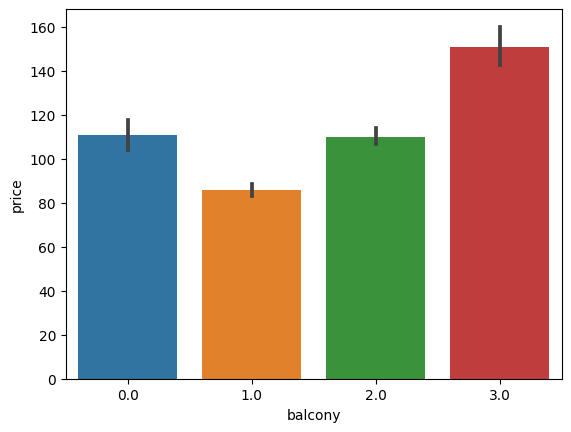

In [24]:
sns.barplot(x= data.balcony,y = data.price)

## Filling missing values of balcony

In [25]:
balcony_values = np.random.randint(data.balcony.mean()-data.balcony.std(),data.balcony.mean()+data.balcony.std(),609)

In [26]:
data['balcony'][data.balcony.isnull()] = balcony_values

C:\Users\DARSHIT\AppData\Local\Temp\ipykernel_11956\499434042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['balcony'][data.balcony.isnull()] = balcony_values


In [27]:
data.isnull().sum()

area_type      0
location       0
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [28]:
data.bath.fillna(data.bath.median(),inplace=True)

In [29]:
data['size'].fillna(data['size'].mode()[0],inplace=True)

In [30]:
data.describe()

,total_sqft,bath,balcony,price
count,1.332000e+04,13320.000000,13320.000000,13320.000000
mean,1.908617e+03,2.688814,1.534309,112.565627
std,1.725778e+04,1.338754,0.837334,148.971674
min,1.000000e+00,1.000000,0.000000,8.000000
25%,1.100000e+03,2.000000,1.000000,50.000000
50%,1.277250e+03,2.000000,2.000000,72.000000
75%,1.680000e+03,3.000000,2.000000,120.000000
max,1.306800e+06,40.000000,3.000000,3600.000000


In [31]:
data['bhk'] = data['size'].str.split().str.get(0).astype(int)

In [32]:
data[data.bhk > 20]

,area_type,location,size,total_sqft,bath,balcony,price,bhk
1718,Super built-up Area,2Electronic City Phase II,27 BHK,8000.0,27.0,0.0,230.0,27
4684,Plot Area,Munnekollal,43 Bedroom,2400.0,40.0,0.0,660.0,43


In [33]:
data['price_per_sqft'] = data['price']*100000 / data['total_sqft']

In [34]:
data['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [35]:
data.corr(numeric_only=True)

,total_sqft,bath,balcony,price,bhk,price_per_sqft
total_sqft,1.000000,0.053218,-0.005957,0.049008,0.054493,-0.002087
bath,0.053218,1.000000,0.108618,0.454449,0.895786,0.030973
balcony,-0.005957,0.108618,1.000000,0.048140,0.099512,-0.002368
price,0.049008,0.454449,0.048140,1.000000,0.398074,0.028477
bhk,0.054493,0.895786,0.099512,0.398074,1.000000,0.030926
price_per_sqft,-0.002087,0.030973,-0.002368,0.028477,0.030926,1.000000


In [36]:
data['location'] = data.location.apply(lambda x: x.strip())

In [37]:
location_count = data.location.value_counts()

In [38]:
location_count

location
Whitefield                        542
Sarjapur  Road                    399
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1294, dtype: int64

In [39]:
location_count_less_10 = location_count[location_count <= 10]

In [40]:
location_count_less_10.count()

1053

In [41]:
data.location = data.location.apply(lambda x: 'other' if x in location_count_less_10 else x)

In [42]:
data.location.value_counts()

location
other                 2885
Whitefield             542
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: count, Length: 242, dtype: int64

In [43]:
data.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


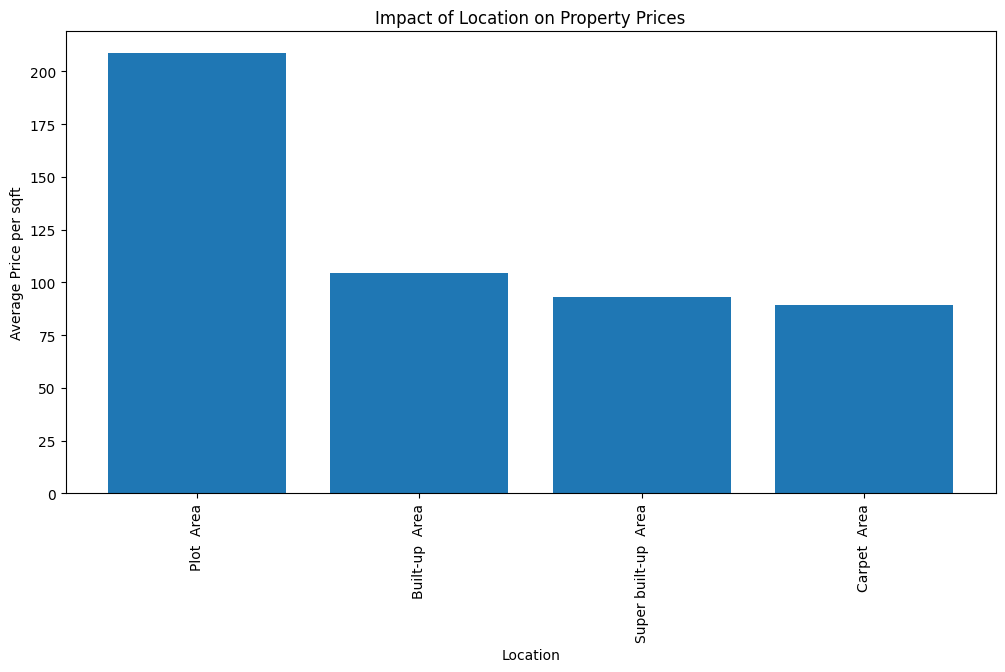

In [44]:
average_price_by_location = data.groupby('area_type')['price'].mean().reset_index()

# Sort the data by average price in descending order
average_price_by_location = average_price_by_location.sort_values(by='price', ascending=False)

# Create a bar chart to visualize the data
plt.figure(figsize=(12, 6))
plt.bar(average_price_by_location['area_type'], average_price_by_location['price'])
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Average Price per sqft')
plt.title('Impact of Location on Property Prices')
plt.show()

C:\Users\DARSHIT\AppData\Local\Temp\ipykernel_11956\2627369951.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.price_per_sqft)


<Axes: xlabel='price_per_sqft', ylabel='Density'>

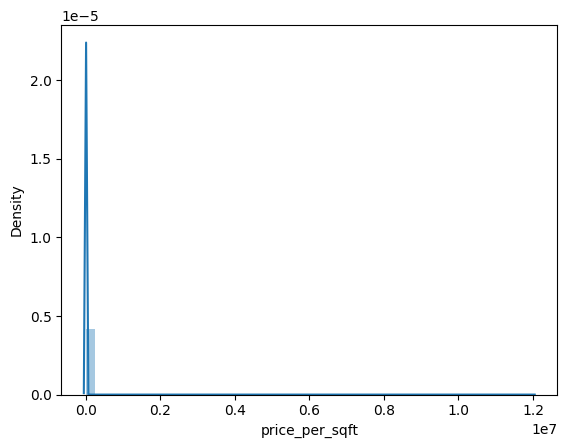

In [45]:
sns.distplot(data.price_per_sqft)

## Outlier Detection

## IQR on total_sqft

In [46]:
data['sq_bhk'] = data['total_sqft']/data['bhk']

In [47]:
data

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft,sq_bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606,528.00
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615,650.00
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556,480.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861,507.00
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000,600.00
...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,6689.834926,690.60
13316,Super built-up Area,other,4 BHK,3600.0,5.0,1.0,400.00,4,11111.111111,900.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,5258.545136,570.50
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,10407.336319,1172.25


## Checking Distribuion of Every Column

total_sqft


C:\Users\DARSHIT\AppData\Local\Temp\ipykernel_11956\934777279.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


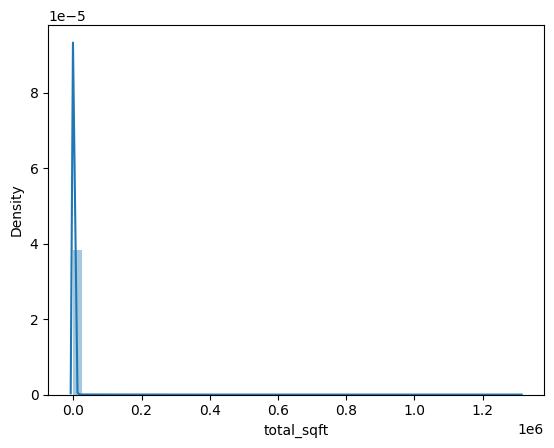

bath


C:\Users\DARSHIT\AppData\Local\Temp\ipykernel_11956\934777279.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


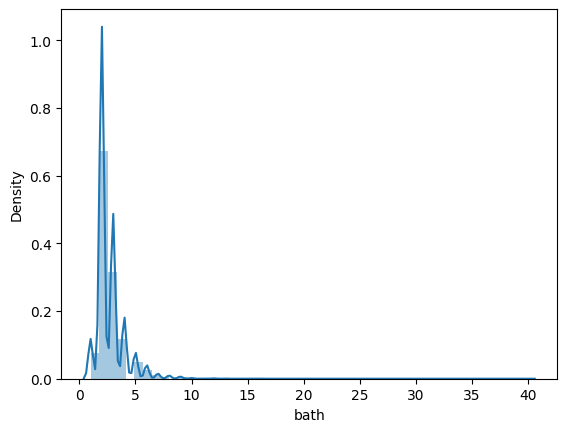

balcony


C:\Users\DARSHIT\AppData\Local\Temp\ipykernel_11956\934777279.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


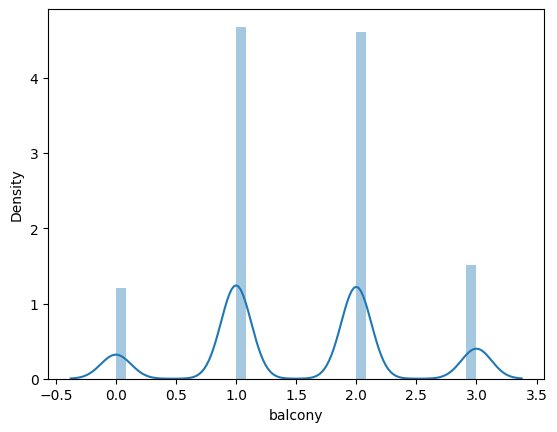

price


C:\Users\DARSHIT\AppData\Local\Temp\ipykernel_11956\934777279.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


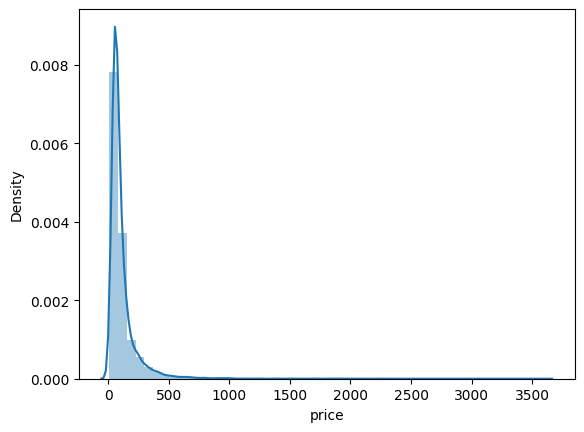

bhk


C:\Users\DARSHIT\AppData\Local\Temp\ipykernel_11956\934777279.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


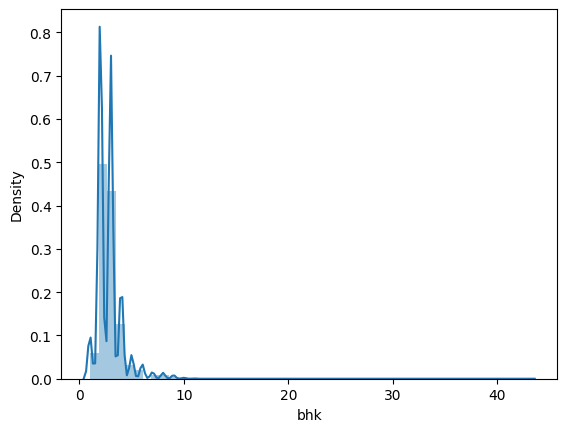

price_per_sqft


C:\Users\DARSHIT\AppData\Local\Temp\ipykernel_11956\934777279.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


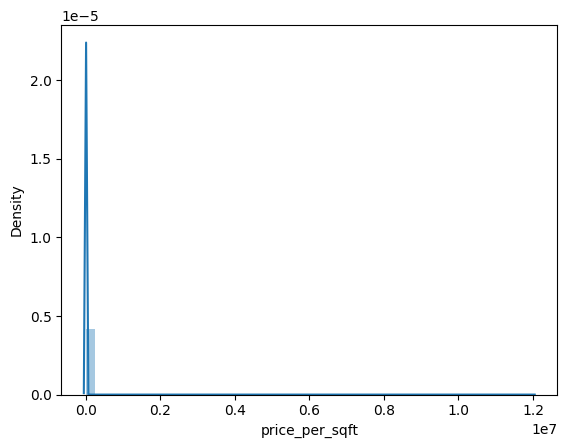

sq_bhk


C:\Users\DARSHIT\AppData\Local\Temp\ipykernel_11956\934777279.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


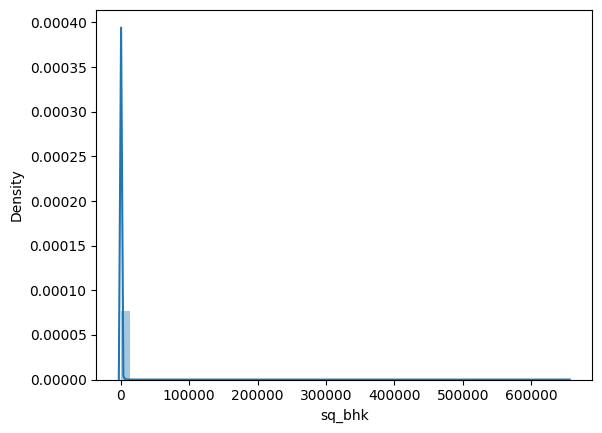

In [48]:
for i in data.columns:
    if data[i].dtype != 'object':
        print(i)
        sns.distplot(data[i])
        plt.show()

In [49]:
for i in data.columns:
    print(data[i].value_counts())
    print('*'*50)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
**************************************************
location
other                 2885
Whitefield             542
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: count, Length: 242, dtype: int64
**************************************************
size
2 BHK         5215
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK          

In [50]:
Q1 = data['total_sqft'].quantile(0.25)
Q3 = data['total_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and remove outliers
new_data = data[(data['total_sqft'] >= lower_bound) & (data['total_sqft'] <= upper_bound)]

In [51]:
for i in new_data.columns:
    print(new_data[i].value_counts())
    print('*'*50)

area_type
Super built-up  Area    8270
Built-up  Area          2084
Plot  Area              1691
Carpet  Area              82
Name: count, dtype: int64
**************************************************
location
other               2550
Whitefield           448
Sarjapur  Road       343
Electronic City      303
Kanakpura Road       266
                    ... 
Konanakunte            8
Kodihalli              7
Chikka Tirupathi       7
Doddaballapur          6
Cunningham Road        1
Name: count, Length: 242, dtype: int64
**************************************************
size
2 BHK         5207
3 BHK         4171
1 BHK          534
4 Bedroom      532
3 Bedroom      462
2 Bedroom      319
5 Bedroom      224
4 BHK          188
6 Bedroom      158
1 Bedroom       97
8 Bedroom       64
7 Bedroom       61
9 Bedroom       35
5 BHK           18
6 BHK           17
1 RK            13
7 BHK            8
10 Bedroom       8
8 BHK            3
11 Bedroom       2
19 BHK           1
43 Bedroom       1


In [52]:
new_data.shape

(12127, 10)

C:\Users\DARSHIT\AppData\Local\Temp\ipykernel_11956\3803462747.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data.bhk)


<Axes: xlabel='bhk', ylabel='Density'>

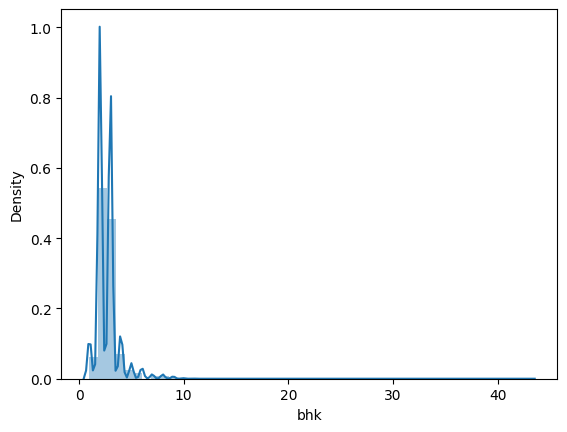

In [53]:
sns.distplot(new_data.bhk)

In [54]:
new_data.corr(numeric_only=True)

,total_sqft,bath,balcony,price,bhk,price_per_sqft,sq_bhk
total_sqft,1.000000,0.400641,0.247249,0.563539,0.374598,0.112742,0.381249
bath,0.400641,1.000000,0.134811,0.505926,0.892631,0.433825,-0.392520
balcony,0.247249,0.134811,1.000000,0.074056,0.119235,-0.014611,0.012964
price,0.563539,0.505926,0.074056,1.000000,0.484226,0.791946,0.022215
bhk,0.374598,0.892631,0.119235,0.484226,1.000000,0.427025,-0.531230
price_per_sqft,0.112742,0.433825,-0.014611,0.791946,0.427025,1.000000,-0.240404
sq_bhk,0.381249,-0.392520,0.012964,0.022215,-0.531230,-0.240404,1.000000


In [55]:
#new_data.drop('sq_bhk',axis=1,inplace=True)

In [56]:
new_data.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft,sq_bhk
count,12127.000000,12127.000000,12127.000000,12127.000000,12127.000000,12127.000000,12127.000000
mean,1323.135449,2.513647,1.530634,87.189476,2.662324,6434.726228,531.969237
std,415.088451,1.159529,0.811754,71.321687,1.179160,4379.476082,148.700188
min,250.000000,1.000000,0.000000,8.000000,1.000000,500.000000,51.666720
25%,1080.000000,2.000000,1.000000,48.000000,2.000000,4200.285626,465.666667
50%,1236.000000,2.000000,2.000000,67.000000,2.000000,5283.711615,544.000000
75%,1541.000000,3.000000,2.000000,100.000000,3.000000,6942.090826,603.500000
max,2550.000000,40.000000,3.000000,1400.000000,43.000000,176470.588235,2400.000000


C:\Users\DARSHIT\AppData\Local\Temp\ipykernel_11956\3803462747.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data.bhk)


<Axes: xlabel='bhk', ylabel='Density'>

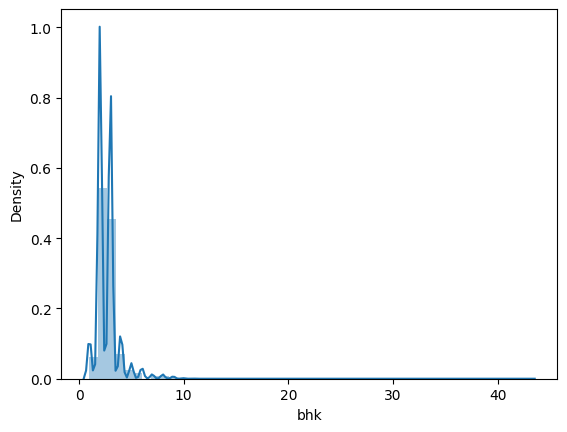

In [57]:
sns.distplot(new_data.bhk)

In [58]:
new_data.bhk.value_counts()

bhk
2     5526
3     4633
4      720
1      644
5      242
6      175
7       69
8       67
9       36
10       8
11       2
19       1
43       1
14       1
12       1
18       1
Name: count, dtype: int64

In [59]:
new_data.drop('size',axis=1,inplace=True)

C:\Users\DARSHIT\AppData\Local\Temp\ipykernel_11956\1162017719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.drop('size',axis=1,inplace=True)


In [60]:
new_data.shape

(12127, 9)

In [61]:
new_data.head()

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,sq_bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606,528.0
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556,480.0
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861,507.0
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000,600.0
5,Super built-up Area,Whitefield,1170.0,2.0,1.0,38.00,2,3247.863248,585.0


In [62]:
new_data.bhk.unique()

array([ 2,  3,  6,  1,  4,  8,  7,  5,  9, 10, 11, 19, 43, 14, 12, 18])

In [63]:
new_data.bath.unique()

array([ 2.,  3.,  6.,  1.,  4.,  9.,  7.,  5.,  8., 11., 10., 12., 16.,
       40., 15., 13., 18.])

C:\Users\DARSHIT\AppData\Local\Temp\ipykernel_11956\4010065514.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data.bath)


<Axes: xlabel='bath', ylabel='Density'>

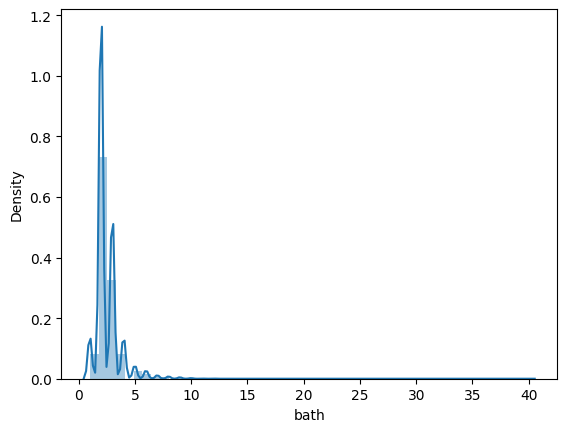

In [64]:
sns.distplot(new_data.bath)

In [65]:
def fun2(x):

    if x > 4:
        return '5'
    else:
        return str(int(x))

In [66]:
new_data.bhk = new_data.bhk.apply(fun2)
new_data.bath = new_data.bath.apply(fun2)

C:\Users\DARSHIT\AppData\Local\Temp\ipykernel_11956\2422670145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.bhk = new_data.bhk.apply(fun2)
C:\Users\DARSHIT\AppData\Local\Temp\ipykernel_11956\2422670145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.bath = new_data.bath.apply(fun2)


In [67]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12127 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       12127 non-null  object 
 1   location        12127 non-null  object 
 2   total_sqft      12127 non-null  float64
 3   bath            12127 non-null  object 
 4   balcony         12127 non-null  float64
 5   price           12127 non-null  float64
 6   bhk             12127 non-null  object 
 7   price_per_sqft  12127 non-null  float64
 8   sq_bhk          12127 non-null  float64
dtypes: float64(5), object(4)
memory usage: 947.4+ KB


In [68]:
new_data.bath.value_counts()

bath
2    6922
3    3096
4     777
1     775
5     557
Name: count, dtype: int64

In [69]:
new_data.bhk.value_counts()

bhk
2    5526
3    4633
4     720
1     644
5     604
Name: count, dtype: int64

In [70]:
new_data.head()

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,sq_bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2,1.0,39.07,2,3699.810606,528.0
2,Built-up Area,Uttarahalli,1440.0,2,3.0,62.00,3,4305.555556,480.0
3,Super built-up Area,Lingadheeranahalli,1521.0,3,1.0,95.00,3,6245.890861,507.0
4,Super built-up Area,Kothanur,1200.0,2,1.0,51.00,2,4250.000000,600.0
5,Super built-up Area,Whitefield,1170.0,2,1.0,38.00,2,3247.863248,585.0


In [71]:
new_data.corr(numeric_only=True)

,total_sqft,balcony,price,price_per_sqft,sq_bhk
total_sqft,1.000000,0.247249,0.563539,0.112742,0.381249
balcony,0.247249,1.000000,0.074056,-0.014611,0.012964
price,0.563539,0.074056,1.000000,0.791946,0.022215
price_per_sqft,0.112742,-0.014611,0.791946,1.000000,-0.240404
sq_bhk,0.381249,0.012964,0.022215,-0.240404,1.000000


In [72]:
#new_data.drop(columns=['price_per_sqft'],axis=1,inplace=True)

In [73]:
new_data.head()

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,sq_bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2,1.0,39.07,2,3699.810606,528.0
2,Built-up Area,Uttarahalli,1440.0,2,3.0,62.00,3,4305.555556,480.0
3,Super built-up Area,Lingadheeranahalli,1521.0,3,1.0,95.00,3,6245.890861,507.0
4,Super built-up Area,Kothanur,1200.0,2,1.0,51.00,2,4250.000000,600.0
5,Super built-up Area,Whitefield,1170.0,2,1.0,38.00,2,3247.863248,585.0


In [74]:
new_data.corr(numeric_only=True)

,total_sqft,balcony,price,price_per_sqft,sq_bhk
total_sqft,1.000000,0.247249,0.563539,0.112742,0.381249
balcony,0.247249,1.000000,0.074056,-0.014611,0.012964
price,0.563539,0.074056,1.000000,0.791946,0.022215
price_per_sqft,0.112742,-0.014611,0.791946,1.000000,-0.240404
sq_bhk,0.381249,0.012964,0.022215,-0.240404,1.000000


In [75]:
#new_data.drop(columns=['size'],axis=1,inplace=True)

## Training Model

In [76]:
x = new_data.drop(['price'],axis=1)
y = new_data['price']

In [77]:
x_train,x_text,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=34)

In [78]:
x_train.head()

,area_type,location,total_sqft,bath,balcony,bhk,price_per_sqft,sq_bhk
222,Built-up Area,other,2000.0,4,1.0,4,3775.000000,500.000000
197,Built-up Area,other,1783.0,3,1.0,3,6449.803702,594.333333
10799,Plot Area,other,1050.0,5,1.0,4,7047.619048,262.500000
7999,Plot Area,other,1200.0,3,2.0,5,15000.000000,240.000000
5059,Super built-up Area,Electronic City,660.0,1,1.0,2,2424.242424,330.000000


In [79]:
ct1 = ColumnTransformer([
    ('t1',OrdinalEncoder(),['bath','bhk','balcony']),
    ('t2',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),['area_type','location'])
],remainder='passthrough')

In [80]:
ct1.fit_transform(x_train).shape

C:\Users\DARSHIT\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(9701, 249)

In [81]:
pipe = Pipeline([
    ('p1',ct1),
    ('scaler',StandardScaler()),
    ('lg',RandomForestRegressor())
])

In [82]:
pipe.fit(x_train,y_train)

C:\Users\DARSHIT\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('p1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('t1', OrdinalEncoder(),
                                                  ['bath', 'bhk', 'balcony']),
                                                 ('t2',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['area_type', 'location'])])),
                ('scaler', StandardScaler()), ('lg', RandomForestRegressor())])

In [83]:
y_pred = pipe.predict(x_text)

C:\Users\DARSHIT\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [84]:
r2_score(y_test,y_pred)

0.9920139020045521

In [85]:
cv = cross_val_score(pipe,x_train,y_train,cv=5,scoring='r2')

C:\Users\DARSHIT\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DARSHIT\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DARSHIT\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DARSHIT\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

In [86]:
np.mean(cv)

0.9886714502664024

In [88]:
mean_squared_error(y_test,y_pred)

35.398154215364805

In [89]:
mean_absolute_error(y_test,y_pred)

0.837177122835945

In [90]:
mean_absolute_percentage_error(y_test,y_pred)

0.009098971317695138